In [2]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
import category_encoders as ce
import statsmodels.api as sm
import sklearn.ensemble
#import lightgbm
import sklearn.metrics
import time
import seaborn as sns
import matplotlib.pyplot as plt

tqdm.pandas()

/Users/sascha/Desktop/Master/mlim/mlim/env/lib/python3.8/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [53]:
# loading the data
baskets = pd.read_parquet('baskets.parquet')
coupons = pd.read_parquet('coupons.parquet')

# merging the data
df = baskets.copy()
df = df.merge(coupons, how='left')
df.to_parquet('df.parquet')

In [59]:
def get_tr(df, week):
    import itertools
    
    week = [week] if type(week) != list else week
    product = list(range(250))
    shopper = list(range(2000))
    tr = pd.DataFrame(itertools.product(shopper, week, product))
    tr.columns = ['shopper', 'week', 'product']
    tr = tr.merge(df, how='left')
    tr['purchased'] = tr['price'].notna().astype(int) # target
    tr['coupon'] = tr['discount'].notna().astype(int)

    return tr

In [60]:
# converting the full train data set to the test data structure
df_full = pd.read_parquet('df.parquet')
df = df_full.loc[df_full['shopper'] < 2000]
tr = get_tr(df, list(range(90)))
tr.to_parquet('tr.parquet')

In [69]:
tr

,shopper,week,product,price,discount,purchased,coupon
0,0,0,0,NaN,NaN,0,0
1,0,0,1,NaN,NaN,0,0
2,0,0,2,NaN,NaN,0,0
3,0,0,3,NaN,NaN,0,0
4,0,0,4,NaN,NaN,0,0
...,...,...,...,...,...,...,...
44999995,1999,89,245,549.0,NaN,1,0
44999996,1999,89,246,NaN,NaN,0,0
44999997,1999,89,247,NaN,NaN,0,0
44999998,1999,89,248,NaN,NaN,0,0


**2.2 Product history map**

In [68]:
df

,week,shopper,product,price,discount
0,0,0,71,629,NaN
1,0,0,91,605,NaN
2,0,0,116,715,NaN
3,0,0,123,483,NaN
4,0,0,157,592,NaN
...,...,...,...,...,...
68091869,89,1999,144,562,NaN
68091870,89,1999,158,566,NaN
68091871,89,1999,192,549,NaN
68091872,89,1999,213,592,NaN


In [67]:
df_full = pd.read_parquet('df.parquet')
df = df_full.loc[df_full['shopper'] < 2000]

In [ ]:
>>> def test(row):
       return [1, 2]
>>> df= pd.DataFrame(np.random.randn(4, 3), columns=list('ABC'))
>>> df.apply(test, axis=1)

In [95]:
n_shoppers = 2000
n_products = 250




,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]
1,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]
2,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]
3,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]
4,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]
1996,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]
1997,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]
1998,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]


In [90]:
type(product_history)

pandas.core.frame.DataFrame

In [97]:
n_shoppers = 2000
n_products = 250

#product_history = pd.DataFrame(np.array([[-np.infty]]*n_shoppers*n_products).reshape(n_shoppers, n_products))
#for col in product_history.columns:
#    product_history[col] = product_history[col].apply(lambda x: [x])
#product_history.head()

product_history = pd.DataFrame(index=range(n_shoppers), columns=range(n_products))
for col in product_history.columns:
    product_history[col] = product_history[col].apply(lambda x: [-np.Inf])
product_history.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]
1,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]
2,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]
3,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]
4,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]


In [98]:
append_hist = lambda row: product_history.loc[row['shopper'], row['product']].append(row['week'])
df.progress_apply(append_hist, axis=1) # using apply is faster than using a for loop
product_history.head()

100%|██████████| 1378720/1378720 [01:12<00:00, 18975.47it/s]


,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,[-inf],[-inf],[-inf],[-inf],"[-inf, 24.0, 40.0, 45.0, 51.0, 54.0, 58.0, 60....",[-inf],[-inf],[-inf],[-inf],[-inf],...,"[-inf, 27.0]",[-inf],[-inf],"[-inf, 44.0]","[-inf, 5.0, 8.0, 20.0, 37.0, 38.0, 56.0, 59.0]",[-inf],[-inf],[-inf],[-inf],"[-inf, 10.0, 26.0, 28.0, 32.0, 35.0, 40.0, 65...."
1,"[-inf, 7.0, 11.0, 48.0, 61.0, 66.0, 81.0]","[-inf, 2.0, 6.0, 18.0, 20.0, 27.0, 29.0, 49.0,...",[-inf],[-inf],"[-inf, 5.0, 13.0, 21.0, 23.0, 30.0, 47.0, 69.0...",[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],"[-inf, 4.0, 19.0, 22.0, 35.0, 79.0, 88.0]"
2,[-inf],"[-inf, 2.0, 3.0, 6.0, 7.0, 8.0, 9.0, 11.0, 13....",[-inf],[-inf],[-inf],[-inf],"[-inf, 5.0, 10.0, 15.0, 32.0, 54.0]",[-inf],[-inf],"[-inf, 1.0, 17.0]",...,"[-inf, 4.0, 5.0, 16.0, 18.0, 21.0, 26.0, 33.0,...",[-inf],[-inf],[-inf],[-inf],"[-inf, 75.0]",[-inf],[-inf],"[-inf, 3.0, 14.0, 20.0, 42.0, 45.0, 50.0, 51.0...","[-inf, 0.0, 23.0, 30.0, 31.0, 39.0]"
3,[-inf],[-inf],[-inf],[-inf],"[-inf, 7.0, 19.0, 27.0]",[-inf],"[-inf, 0.0, 13.0, 16.0, 18.0, 20.0, 23.0, 30.0...","[-inf, 11.0, 29.0, 38.0, 47.0, 69.0, 85.0]",[-inf],[-inf],...,[-inf],[-inf],[-inf],"[-inf, 57.0]",[-inf],"[-inf, 14.0, 87.0]",[-inf],[-inf],"[-inf, 2.0, 5.0, 10.0, 23.0, 38.0, 44.0, 47.0,...","[-inf, 16.0, 51.0, 71.0]"
4,[-inf],[-inf],"[-inf, 6.0, 15.0, 21.0, 22.0, 27.0, 28.0, 58.0...",[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]


In [11]:
pickle.dump(product_history, open('history.pkl', 'wb'))

In [12]:
# get array of purchase weeks (for shopper and product)
def get_history(product_history, shopper, product, week):
    arr = np.array(product_history.loc[shopper, product])
    return arr[arr < week]

def get_last_purchase(product_history, shopper, product, week):
    return get_history(product_history, shopper, product, week)[-1]

# 
def get_trend(row, trend_window):
    arr = row['product_history']
    return np.unique(arr[arr >= row['week'] - trend_window]).shape[0] / trend_window

In [13]:
shopper = 0
product = 4
week = 89

get_last_purchase(product_history, shopper, product, week)

70.0

### **2.3 Product price map**

In [14]:
tr_full = pd.read_parquet('tr.parquet')

# cleaning the price feature
tr_full['price_w_discount'] = tr_full['price'].copy()
tr_full.loc[:, 'price'] = (tr_full['price_w_discount'] / (1-tr_full['discount'].fillna(0)/100))
tr_full.loc[:, ['price', 'price_w_discount']].describe().round(2)

,price,price_w_discount
count,1378720.00,1378720.00
mean,590.73,584.34
std,92.70,97.43
min,389.23,234.00
25%,510.00,506.00
50%,582.00,579.00
75%,657.00,654.00
max,837.65,837.00


In [15]:
# comparing mean and mode replacement
tr_full.loc[:, ['product', 'price', 'price_w_discount']].groupby(by='product').agg(['mean', lambda x:x.value_counts().index[0]])

price            price_w_discount           
               mean <lambda_0>             mean <lambda_0>
product                                                   
0        687.967659      688.0       678.646387      688.0
1        560.000000      560.0       554.625037      560.0
2        773.017687      773.0       763.236715      773.0
3        721.981121      722.0       711.966548      722.0
4        620.000000      620.0       612.488540      620.0
...             ...        ...              ...        ...
245      548.968599      549.0       542.371396      549.0
246      701.999062      702.0       694.611111      702.0
247      670.004421      670.0       661.146803      670.0
248      489.988068      490.0       484.861361      490.0
249      498.984355      499.0       493.634703      499.0

[250 rows x 4 columns]

In [16]:
mode_prices = {}
for week in tqdm(range(91)):
    mode_prices.update({week: tr_full.loc[tr_full['week'] < week, ['product', 'price']].groupby(by='product').agg(lambda x:x.value_counts().index[0]).to_dict()['price']})
mode_prices

100%|██████████| 91/91 [08:51<00:00,  5.84s/it]


{0: {},
 1: {0: 688.0,
  1: 560.0,
  2: 773.0,
  3: 722.0,
  4: 620.0,
  5: 721.0,
  6: 568.0,
  7: 772.0,
  8: 669.0,
  9: 759.0,
  10: 711.0,
  11: 611.0,
  12: 781.0,
  13: 788.0,
  14: 755.0,
  15: 620.0,
  16: 743.0,
  17: 725.0,
  18: 665.0,
  19: 744.0,
  20: 563.0,
  21: 463.0,
  22: 528.0,
  23: 495.0,
  24: 558.0,
  25: 540.0,
  26: 628.0,
  27: 582.0,
  28: 442.0,
  29: 542.0,
  30: 644.0,
  31: 784.0,
  32: 684.0,
  33: 665.0,
  34: 706.0,
  35: 602.0,
  36: 696.0,
  37: 772.0,
  38: 699.0,
  39: 593.0,
  40: 470.0,
  41: 660.0,
  42: 527.0,
  43: 546.0,
  44: 485.0,
  45: 590.0,
  46: 523.0,
  47: 592.0,
  48: 465.0,
  49: 613.0,
  50: 673.0,
  51: 640.0,
  52: 607.0,
  53: 672.0,
  54: 773.0,
  55: 757.0,
  56: 761.0,
  57: 716.0,
  58: 713.0,
  59: 527.0,
  60: 795.0,
  61: 822.0,
  62: 573.0,
  63: 719.0,
  64: 575.0,
  65: 719.0,
  66: 743.0,
  67: 637.0,
  68: 748.0,
  69: 752.0,
  70: 737.0,
  71: 629.0,
  72: 788.0,
  73: 837.0,
  74: 779.0,
  75: 654.0,
  76: 582.0

In [17]:
pickle.dump(mode_prices, open('prices.pkl', 'wb'))

In [37]:
tr_full

,shopper,week,product,price,discount,purchased,coupon
0,0,0,0,NaN,NaN,0,0
1,0,0,1,NaN,NaN,0,0
2,0,0,2,NaN,NaN,0,0
3,0,0,3,NaN,NaN,0,0
4,0,0,4,NaN,NaN,0,0
...,...,...,...,...,...,...,...
44999995,1999,89,245,549.0,NaN,1,0
44999996,1999,89,246,NaN,NaN,0,0
44999997,1999,89,247,NaN,NaN,0,0
44999998,1999,89,248,NaN,NaN,0,0


### **2.4 Train test split**

In [18]:
def train_test_split(tr_full, test_week, train_window, features='default'):
    time_start = time.time()

    # reducing data to specified weeks
    start = test_week - train_window
    df = tr_full.loc[(tr_full['week'] >= start) & (tr_full['week'] <= test_week), :]

    # cleaning prices
    df.loc[df['price'].isna(), 'price'] = df.loc[df['price'].isna(), :].progress_apply(lambda row: mode_prices[row['week']][row['product']], axis=1)

    # shopper-product histories
    df.loc[:, 'product_history'] = df.progress_apply(lambda row: get_history(product_history, row['shopper'], row['product'], row['week']), axis = 1)
    df.loc[:, 'last_purchase'] = df['product_history'].progress_apply(lambda x: x[-1])
    df.loc[:, 'weeks_since_last_purchase'] = df['week'] - df['last_purchase']
    df.loc[df['weeks_since_last_purchase'] == np.inf, 'weeks_since_last_purchase'] = np.ceil(df['week'].max() * 1.15)

    # trends
    windows = [1, 3, 5]
    for window in windows:
        df.loc[:, 'trend_'+str(window)] = df.progress_apply(lambda row: get_trend(row, window), axis=1)

    # shopper-product freq
    df.loc[:, 'product_freq'] = df.progress_apply(lambda row: get_trend(row, row['week']), axis=1)

    # drop redundant columns
    redundant = ['discount', 'coupon', 'price_w_discount']
    cols = [col for col in df.columns if col not in redundant]
    tr = df.loc[df['week'] != test_week, cols]
    ts = df.loc[df['week'] == test_week, cols]

    # WOE category encoding
    encoder = ce.WOEEncoder()
    tr.loc[:, 'shopper_WOE'] = encoder.fit_transform(tr['shopper'].astype('category'), tr['purchased'])['shopper'].values
    ts.loc[:, 'shopper_WOE'] = encoder.transform(ts['shopper'].astype('category'))['shopper'].values
    encoder = ce.WOEEncoder()
    tr.loc[:, 'product_WOE'] = encoder.fit_transform(tr['product'].astype('category'), tr['purchased'])['product'].values
    ts.loc[:, 'product_WOE'] = encoder.transform(ts['product'].astype('category'))['product'].values

    # final split
    features = [col for col in tr.columns if col not in ['purchased', 'shopper', 'week', 'product', 'product_history', 'last_purchase']] if features == 'default' else features
    X_train = tr.loc[:, features]
    y_train = tr['purchased']
    X_test = ts.loc[:, features]
    y_test = ts['purchased']

    print(f'[elapsed time] {np.round(time.time() - time_start, 2)/60} min')
    return X_train, y_train, X_test, y_test

In [39]:
product_history

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,[-inf],[-inf],[-inf],[-inf],"[-inf, 24.0, 40.0, 45.0, 51.0, 54.0, 58.0, 60....",[-inf],[-inf],[-inf],[-inf],[-inf],...,"[-inf, 27.0]",[-inf],[-inf],"[-inf, 44.0]","[-inf, 5.0, 8.0, 20.0, 37.0, 38.0, 56.0, 59.0]",[-inf],[-inf],[-inf],[-inf],"[-inf, 10.0, 26.0, 28.0, 32.0, 35.0, 40.0, 65...."
1,"[-inf, 7.0, 11.0, 48.0, 61.0, 66.0, 81.0]","[-inf, 2.0, 6.0, 18.0, 20.0, 27.0, 29.0, 49.0,...",[-inf],[-inf],"[-inf, 5.0, 13.0, 21.0, 23.0, 30.0, 47.0, 69.0...",[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],"[-inf, 4.0, 19.0, 22.0, 35.0, 79.0, 88.0]"
2,[-inf],"[-inf, 2.0, 3.0, 6.0, 7.0, 8.0, 9.0, 11.0, 13....",[-inf],[-inf],[-inf],[-inf],"[-inf, 5.0, 10.0, 15.0, 32.0, 54.0]",[-inf],[-inf],"[-inf, 1.0, 17.0]",...,"[-inf, 4.0, 5.0, 16.0, 18.0, 21.0, 26.0, 33.0,...",[-inf],[-inf],[-inf],[-inf],"[-inf, 75.0]",[-inf],[-inf],"[-inf, 3.0, 14.0, 20.0, 42.0, 45.0, 50.0, 51.0...","[-inf, 0.0, 23.0, 30.0, 31.0, 39.0]"
3,[-inf],[-inf],[-inf],[-inf],"[-inf, 7.0, 19.0, 27.0]",[-inf],"[-inf, 0.0, 13.0, 16.0, 18.0, 20.0, 23.0, 30.0...","[-inf, 11.0, 29.0, 38.0, 47.0, 69.0, 85.0]",[-inf],[-inf],...,[-inf],[-inf],[-inf],"[-inf, 57.0]",[-inf],"[-inf, 14.0, 87.0]",[-inf],[-inf],"[-inf, 2.0, 5.0, 10.0, 23.0, 38.0, 44.0, 47.0,...","[-inf, 16.0, 51.0, 71.0]"
4,[-inf],[-inf],"[-inf, 6.0, 15.0, 21.0, 22.0, 27.0, 28.0, 58.0...",[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,[-inf],"[-inf, 1.0, 4.0, 8.0, 21.0, 23.0, 24.0, 25.0, ...",[-inf],[-inf],[-inf],[-inf],"[-inf, 10.0, 17.0, 22.0, 56.0, 66.0, 85.0, 86....",[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],"[-inf, 0.0, 6.0, 8.0, 9.0, 15.0, 22.0, 37.0, 4...",[-inf]
1996,[-inf],[-inf],[-inf],[-inf],[-inf],"[-inf, 0.0, 2.0, 5.0, 10.0, 20.0, 32.0, 37.0, ...",[-inf],"[-inf, 41.0]",[-inf],"[-inf, 54.0]",...,[-inf],[-inf],"[-inf, 12.0, 19.0, 86.0]",[-inf],[-inf],[-inf],"[-inf, 6.0]",[-inf],[-inf],"[-inf, 0.0, 1.0, 4.0, 5.0, 7.0, 8.0, 10.0, 14...."
1997,"[-inf, 37.0, 74.0]",[-inf],[-inf],[-inf],[-inf],"[-inf, 54.0]",[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],"[-inf, 14.0, 28.0, 44.0, 45.0, 48.0, 50.0, 56...."
1998,"[-inf, 12.0, 52.0, 54.0]","[-inf, 8.0, 36.0, 44.0, 82.0, 85.0]",[-inf],[-inf],"[-inf, 56.0, 61.0]",[-inf],[-inf],"[-inf, 53.0]","[-inf, 7.0]",[-inf],...,[-inf],[-inf],"[-inf, 25.0]",[-inf],"[-inf, 34.0, 63.0, 67.0, 81.0]",[-inf],[-inf],"[-inf, 3.0, 17.0, 29.0, 30.0, 51.0, 58.0, 75.0]",[-inf],[-inf]


In [19]:
tr_full = pd.read_parquet('tr.parquet')
product_history = pickle.load(open('history.pkl', 'rb'))
mode_prices = pickle.load(open('prices.pkl', 'rb'))

In [48]:
   # return np.unique(arr[arr >= row['week'] - trend_window]).shape[0] / trend_window
so = np.unique([1,2,3,4,5])
so.shape[0]

5

In [44]:
X_train[X_train['trend_1'] == 1][0:60]

,price,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq,shopper_WOE,product_WOE
21261,611.0,1.0,1.0,0.333333,0.2,0.105882,0.039796,0.308272
21321,503.0,1.0,1.0,1.000000,0.6,0.752941,0.039796,-0.077838
21341,605.0,1.0,1.0,1.000000,1.0,0.823529,0.039796,-0.152654
21366,715.0,1.0,1.0,0.666667,0.6,0.352941,0.039796,0.330113
21380,613.0,1.0,1.0,0.666667,0.6,0.682353,0.039796,0.081213
21417,582.0,1.0,1.0,0.333333,0.2,0.364706,0.039796,-0.037965
21434,651.0,1.0,1.0,1.000000,0.8,0.576471,0.039796,0.017111
21499,499.0,1.0,1.0,0.333333,0.2,0.141176,0.039796,0.770442
21552,607.0,1.0,1.0,0.333333,0.2,0.104651,0.039796,-0.750550
21571,629.0,1.0,1.0,1.000000,0.8,0.755814,0.039796,-0.077838


In [42]:
X_train

,price,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq,shopper_WOE,product_WOE
21250,688.0,103.0,0.0,0.0,0.0,0.000000,0.039796,-0.541070
21251,560.0,103.0,0.0,0.0,0.0,0.000000,0.039796,0.638078
21252,773.0,103.0,0.0,0.0,0.0,0.000000,0.039796,-0.776683
21253,722.0,103.0,0.0,0.0,0.0,0.000000,0.039796,-1.401178
21254,620.0,15.0,0.0,0.0,0.0,0.094118,0.039796,-0.128700
...,...,...,...,...,...,...,...,...
44999745,549.0,18.0,0.0,0.0,0.0,0.125000,0.071599,-0.878618
44999746,702.0,103.0,0.0,0.0,0.0,0.000000,0.071599,-0.343367
44999747,670.0,103.0,0.0,0.0,0.0,0.000000,0.071599,-1.559153
44999748,490.0,103.0,0.0,0.0,0.0,0.000000,0.071599,0.837201


In [20]:
X_train, y_train, X_test, y_test = train_test_split(tr_full, 85, 4)

100%|██████████| 2423616/2423616 [00:30<00:00, 79566.50it/s]
/Users/sascha/Desktop/Master/mlim/mlim/env/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
100%|██████████| 2500000/2500000 [02:30<00:00, 16622.73it/s]
/Users/sascha/Desktop/Master/mlim/mlim/env/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
100%|██████████| 2500000/25000

[elapsed time] 7.558000000000001 min


<AxesSubplot:>

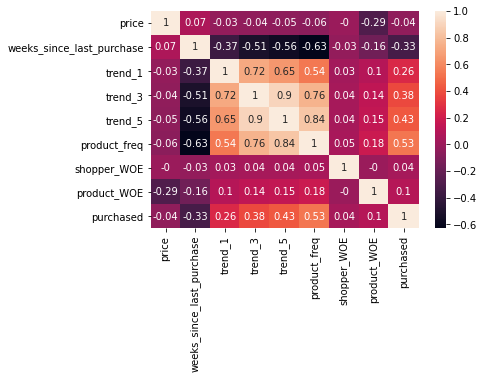

In [21]:
sns.heatmap(X_train.join(y_train).corr().round(2), annot=True)

## **3. Models**

In [22]:
### **3. Model training and evaluation**

class baseline:

    def uniform(X):
        import numpy as np
        return [np.random.uniform(0,1) for x in range(X.shape[0])]

    def constant(X, constant):
        return [constant]*X.shape[0]

In [23]:
tr_full = pd.read_parquet('tr.parquet')
product_history = pickle.load(open('history.pkl', 'rb'))
mode_prices = pickle.load(open('prices.pkl', 'rb'))

weeks = [20, 40, 60, 89]
window = 4
y_hat_tr, y_hat_ts, y_ts, y_tr = {}, {}, {}, {}

parameters_rf = {
    "n_estimators": 100,
    "min_samples_split": 16,
    "max_leaf_nodes": 48,
    "max_features": 0.8,
    "max_depth": 5,
    "bootstrap": True,
    "random_state": 501,
}

time_start = time.time()
for week in weeks:
    # train test split
    X_train, y_train, X_test, y_test = train_test_split(tr_full, week, window)
    dump = (X_train, y_train, X_test, y_test)
    pickle.dump(dump, open(f'split_{week}-{window}.pkl', 'wb'))
    print(f'[week {week}] Finished train-test-split.')

    # logit
    logit = sm.Logit(y_train, X_train).fit()
    logit_c = sm.Logit(y_train, sm.add_constant(X_train)).fit()
    y_hat_tr[f'{week}_logit'] = logit.predict(X_train)
    y_hat_ts[f'{week}_logit'] = logit.predict(X_test)
    y_hat_tr[f'{week}_logit_c'] = logit_c.predict(sm.add_constant(X_train))
    y_hat_ts[f'{week}_logit_c'] = logit_c.predict(sm.add_constant(X_test))
    print(f'[week {week}] Finished logit models.')

    #rf
    random_forest = sklearn.ensemble.RandomForestClassifier(**parameters_rf)
    random_forest.fit(X_train, y_train)
    y_hat_tr[f'{week}_rf'] = random_forest.predict_proba(X_train)[:, 1]
    y_hat_ts[f'{week}_rf'] = random_forest.predict_proba(X_test)[:, 1]
    print(f'[week {week}] Finished random forest model.')

    #lgbm
    #lgbm = lightgbm.LGBMClassifier()
    #lgbm.fit(X_train, y_train)
    #y_hat_tr[f'{week}_lgbm'] = lgbm.predict_proba(X_train)[:, 1]
    #y_hat_ts[f'{week}_lgbm'] = lgbm.predict_proba(X_test)[:, 1]
    #print(f'[week {week}] Finished boosted trees model.')

    # store true values
    y_ts[week] = y_test
    y_tr[week] = y_train

    # baselines
    y_hat_tr[f'{week}_base-random'] = baseline.uniform(X_train)
    y_hat_tr[f'{week}_base-constant_0'] = baseline.constant(X_train, 0)
    y_hat_tr[f'{week}_base-constant_1'] = baseline.constant(X_train, 1)

    y_hat_ts[f'{week}_base-random'] = baseline.uniform(X_test)
    y_hat_ts[f'{week}_base-constant_0'] = baseline.constant(X_test, 0)
    y_hat_ts[f'{week}_base-constant_1'] = baseline.constant(X_test, 1)

    y_hat_tr[f'{week}_base-mgmt1_freq'] = X_train['product_freq']
    y_hat_ts[f'{week}_base-mgmt1_freq'] = X_test['product_freq']

    dump = (y_hat_tr, y_hat_ts, y_ts, y_tr)
    pickle.dump(dump, open('validation.pkl', 'wb'))
    print(f'[week {week}] Finished week {week}.')

print(f'[elapsed time] {np.round(time.time() - time_start, 2)/60} min')

100%|██████████| 2423089/2423089 [00:31<00:00, 77753.56it/s]
/Users/sascha/Desktop/Master/mlim/mlim/env/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
100%|██████████| 2500000/2500000 [02:38<00:00, 15727.47it/s]
/Users/sascha/Desktop/Master/mlim/mlim/env/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
100%|██████████| 2500000/25000

[elapsed time] 7.888333333333334 min
[week 20] Finished train-test-split.
Optimization terminated successfully.
         Current function value: 0.086426
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.085964
         Iterations 9
[week 20] Finished logit models.
[week 20] Finished random forest model.
[week 20] Finished week 20.


100%|██████████| 2423393/2423393 [00:30<00:00, 79268.34it/s]
/Users/sascha/Desktop/Master/mlim/mlim/env/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
100%|██████████| 2500000/2500000 [02:40<00:00, 15545.81it/s]
/Users/sascha/Desktop/Master/mlim/mlim/env/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
100%|██████████| 2500000/25000

[elapsed time] 7.9205000000000005 min
[week 40] Finished train-test-split.
Optimization terminated successfully.
         Current function value: 0.082008
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081195
         Iterations 10
[week 40] Finished logit models.
[week 40] Finished random forest model.
[week 40] Finished week 40.


100%|██████████| 2423853/2423853 [00:30<00:00, 79377.54it/s]
/Users/sascha/Desktop/Master/mlim/mlim/env/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
100%|██████████| 2500000/2500000 [02:35<00:00, 16065.56it/s]
/Users/sascha/Desktop/Master/mlim/mlim/env/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
100%|██████████| 2500000/25000

[elapsed time] 7.8389999999999995 min
[week 60] Finished train-test-split.
Optimization terminated successfully.
         Current function value: 0.080406
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079495
         Iterations 10
[week 60] Finished logit models.
[week 60] Finished random forest model.
[week 60] Finished week 60.


100%|██████████| 2423352/2423352 [00:31<00:00, 75846.26it/s]
/Users/sascha/Desktop/Master/mlim/mlim/env/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
100%|██████████| 2500000/2500000 [02:35<00:00, 16101.60it/s]
/Users/sascha/Desktop/Master/mlim/mlim/env/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
100%|██████████| 2500000/25000

[elapsed time] 7.833666666666667 min
[week 89] Finished train-test-split.
Optimization terminated successfully.
         Current function value: 0.080108
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078993
         Iterations 10
[week 89] Finished logit models.
[week 89] Finished random forest model.
[week 89] Finished week 89.
[elapsed time] 47.53733333333333 min


In [ ]:
y_hat_tr, y_hat_ts, y_ts, y_tr = pickle.load(open('validation.pkl', 'rb'))

In [ ]:
def calculate_scores(weeks, metric, y, y_hat, verbose=1):
    scores = {}
    metric_name = str(metric)
    metric_name = metric_name[metric_name[:metric_name.rfind(' at ')].rfind(' ')+1:metric_name.rfind(' at ')]
    print('-'*45) if verbose > 0 else None
    for week in weeks:
        keys = [key for key in y_hat.keys() if key.startswith(str(week))]
        print(f'[week {week}] {metric_name}\n'+'-'*45) if verbose > 0 else None
        for key in keys:
            scores[key] = metric(y[week], y_hat[key])
            print(f'[{key}] {metric_name}: {scores[key].round(4)}') if verbose > 0 else None
        print('-'*45) if verbose > 0 else None
    return scores

In [ ]:
weeks = [20, 40, 60, 89]
metric = sklearn.metrics.log_loss

scores_tr = calculate_scores(weeks, metric, y_tr, y_hat_tr)

In [ ]:
weeks = [20, 40, 60, 89]
metric = sklearn.metrics.log_loss

scores_ts = calculate_scores(weeks, metric, y_ts, y_hat_ts)

In [ ]:
def scores_to_df(scores):
    df = pd.DataFrame()
    for score in scores:
        df.loc[score[:2], score[3:]] = scores[score]
    return df

In [ ]:
scores_df_tr = scores_to_df(scores_tr)
scores_df_ts = scores_to_df(scores_ts)

fig, axs = plt.subplots(1,2, sharey=True, figsize=(18,5))
scores_df_tr.loc[:, scores_df_tr.columns != 'base-constant_1'].plot(ax=axs[0]);
scores_df_ts.loc[:, scores_df_ts.columns != 'base-constant_1'].plot(ax=axs[1]);
axs[0].set_title('train scores');
axs[1].set_title('test scores');

## **4. Predicting week 90**

In [ ]:
def get_ts(week):
    import itertools
    week = [week] if type(week) != list else week

    product = list(range(250))
    shopper = list(range(2000))
    ts = pd.DataFrame(itertools.product(shopper, week, product))
    ts.rename(columns={0:'shopper', 1:'week', 2:'product'}, inplace=True)
    ts['price'] = ts['discount'] = ts['purchased'] = ts['coupon'] = None

    return ts

In [ ]:
# train-test-split
week = 90
window = 4
tr_full = pd.read_parquet('tr.parquet').append(get_ts(90), ignore_index=True)
product_history = pickle.load(open('history.pkl', 'rb'))
mode_prices = pickle.load(open('prices.pkl', 'rb'))

X_train, y_train, X_test, y_test = train_test_split(tr_full, week, window)
dump = (X_train, y_train, X_test, y_test)
pickle.dump(dump, open(f'split_{week}-{window}.pkl', 'wb'))

In [ ]:
X_train, y_train, X_test, y_test = pickle.load(open('split_90-4.pkl', 'rb'))

In [ ]:
# training the model
lgbm = lightgbm.LGBMClassifier()
lgbm.fit(X_train, y_train.astype('int32'))
y_hat_tr = lgbm.predict_proba(X_train)[:, 1]
y_hat_ts = lgbm.predict_proba(X_test)[:, 1]

In [ ]:
pd.DataFrame(y_hat_tr).describe().round(2)

In [ ]:
pd.DataFrame(y_hat_ts).describe().round(2)

In [ ]:
# train score
sklearn.metrics.log_loss(y_train.astype('int32'), y_hat_tr)

In [ ]:
preds = get_ts(90)
preds['yhat'] = y_hat_ts
preds = preds[['shopper', 'week', 'product', 'yhat']]
preds

In [ ]:
preds.to_parquet('e03-$2.parquet')